<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/main/notebooks/Ugochukwu_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("/content/NGX_ASI_Index_Price_Data.csv")

In [45]:
# preparing the dataset
df['date'] = pd.to_datetime(df['date'], format='%Y-%b')
df = df.sort_values('date')
df.set_index('date', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2012-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [46]:
df.describe()

,avr_monthly_kiloprice
count,137.000000
mean,34.301241
std,8.428547
min,20.520000
25%,27.430000
50%,33.350000
75%,39.270000
max,55.080000


In [47]:
df.head()

,avr_monthly_kiloprice
date,
2012-01-01,20.80
2012-02-01,20.52
2012-03-01,20.92
2012-04-01,21.27
2012-05-01,22.41


In [48]:
df.tail()

,avr_monthly_kiloprice
date,
2023-01-01,52.25
2023-02-01,54.43
2023-03-01,55.08
2023-04-01,52.20
2023-05-01,52.34


In [49]:
# How much has the average monthly kiloprice increased from 2012 to 2023?
start_price = df['avr_monthly_kiloprice'].iloc[0]
last_price = df['avr_monthly_kiloprice'].iloc[-1]

growth = ((last_price - start_price) / start_price) * 100
print(f"Price increased by {growth:.2f}% from 2012 - 2023")

Price increased by 151.63% from 2012 - 2023


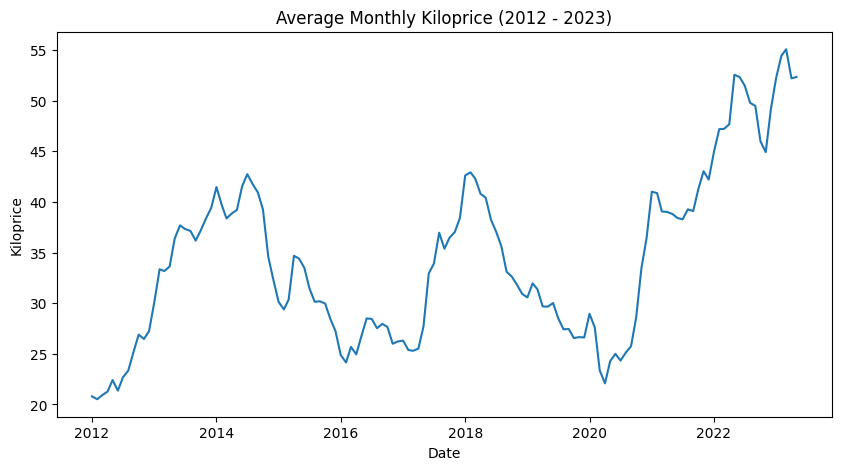

In [50]:
# What is the overall trend of the kiloprice over time?
plt.figure(figsize=(10,5))
plt.plot(df.index, df['avr_monthly_kiloprice'])
plt.title("Average Monthly Kiloprice (2012 - 2023)")
plt.xlabel("Date")
plt.ylabel("Kiloprice")
plt.show()

The series shows a strong upward trend from 2012 to 2023, with noticeable acceleration after 2020 and increased volatility in recent years.

In [51]:
# How has the average kiloprice changed from year to year?
df['year'] = df.index.year
# df['year']
yearly_avg = df.groupby('year')['avr_monthly_kiloprice'].mean()
# yearly_avg.head

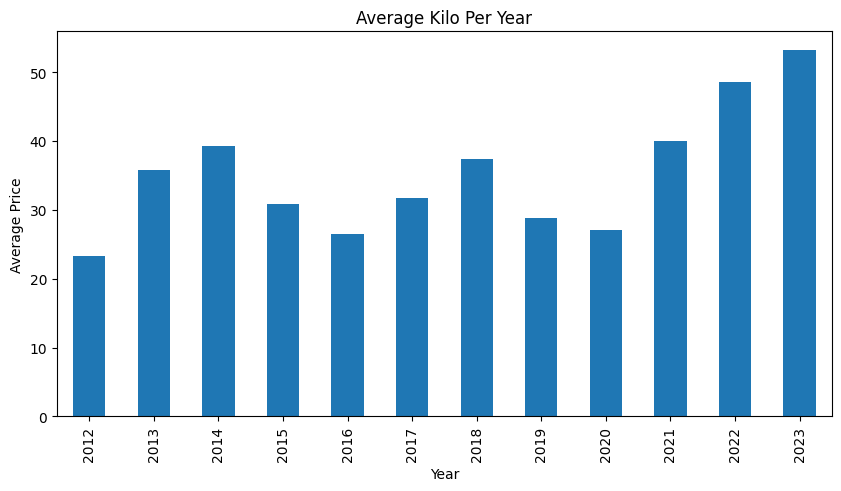

In [52]:
plt.figure(figsize=(10,5))
yearly_avg.plot(kind='bar')
plt.title("Average Kilo Per Year")
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

There's been steady rise and drop from between 2012 - 2020, but a sharp rise after 2020 showing a change in price action.

> Add blockquote



In [53]:
# Do certain months consistently have higher or lower prices?
df['month'] = df.index.month
# df['month']
monthly_average = df.groupby('month')['avr_monthly_kiloprice'].mean()
# monthly_average

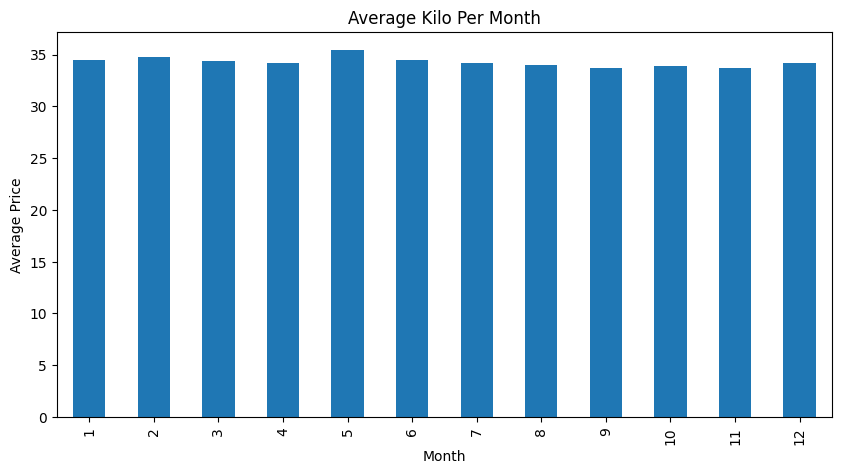

In [54]:
plt.figure(figsize=(10,5))
monthly_average.plot(kind='bar')
plt.title("Average Kilo Per Month")
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

The monthly analysis shows little chnages across months.

In [55]:
# What is the underlying long-term trend after removing short-term fluctuations?
df['rolling_mean_12'] = df['avr_monthly_kiloprice'].rolling(window=12).mean()
# df['rolling_mean_12']

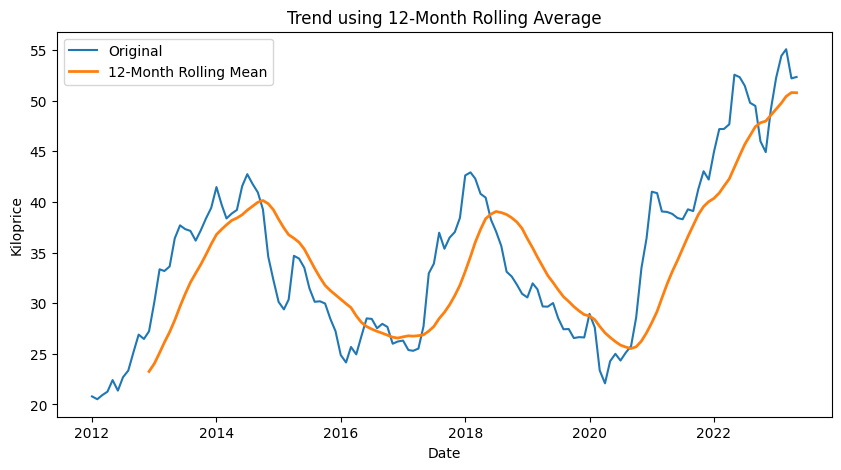

In [56]:
plt.figure(figsize=(10,5))
plt.plot(df['avr_monthly_kiloprice'], label='Original')
plt.plot(df['rolling_mean_12'], label='12-Month Rolling Mean', linewidth=2)
plt.title("Trend using 12-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Kiloprice")
plt.legend()
plt.show()

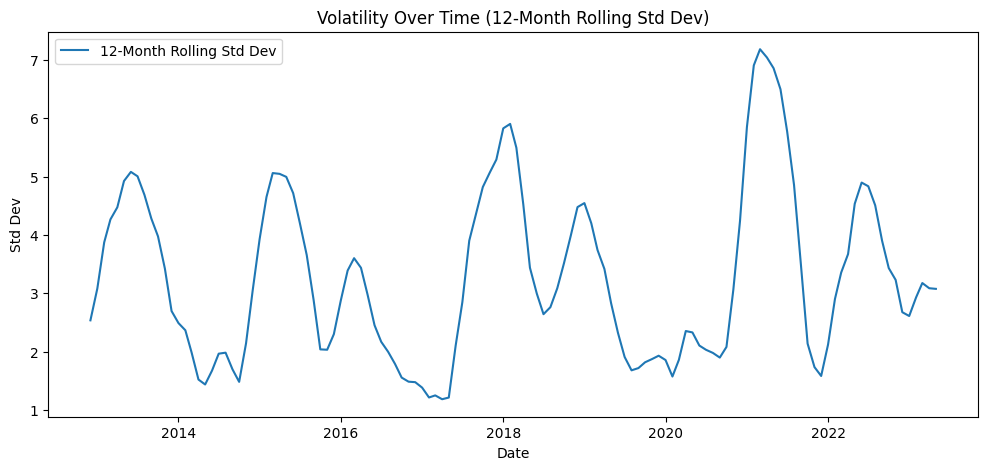

In [57]:
# How have price volatility and growth behavior changed over time?
df['rolling_std_12'] = df['avr_monthly_kiloprice'].rolling(window=12).std()

plt.figure(figsize=(12,5))
plt.plot(df['rolling_std_12'], label='12-Month Rolling Std Dev')
plt.title("Volatility Over Time (12-Month Rolling Std Dev)")
plt.xlabel("Date")
plt.ylabel("Std Dev")
plt.legend()
plt.show()



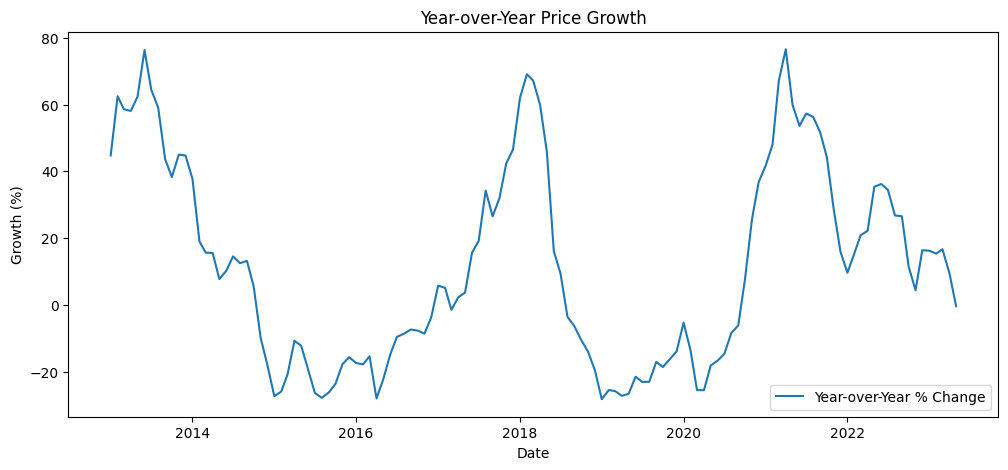

In [58]:
# Is there evidence of a structural shift after 2020?
df['YoY_change'] = df['avr_monthly_kiloprice'].pct_change(periods=12) * 100

plt.figure(figsize=(12,5))
plt.plot(df['YoY_change'], label='Year-over-Year % Change')
plt.title("Year-over-Year Price Growth")
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.legend()
plt.show()